<a href="https://colab.research.google.com/github/GOVINDFROMINDIA/Skymet-Version-Control/blob/main/Map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install geopandas
!pip install matplotlib


In [ ]:
from google.colab import drive
drive.mount('drive')

Mounted at drive


<ipython-input-4-79cb538584e6>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


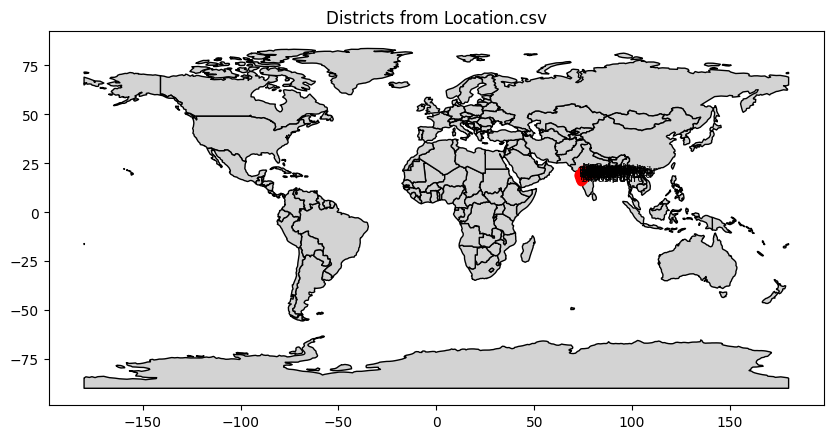

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

csv_file = '/content/drive/MyDrive/skymet/Location.csv'
df = pd.read_csv(csv_file)

geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(10, 6), color='lightgray', edgecolor='black')

gdf.plot(ax=ax, color='red', marker='o', label='Districts')

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['District']):
    ax.text(x, y, label, fontsize=8)

plt.title('Districts from Location.csv')
plt.show()


<ipython-input-5-89144b57c186>:15: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


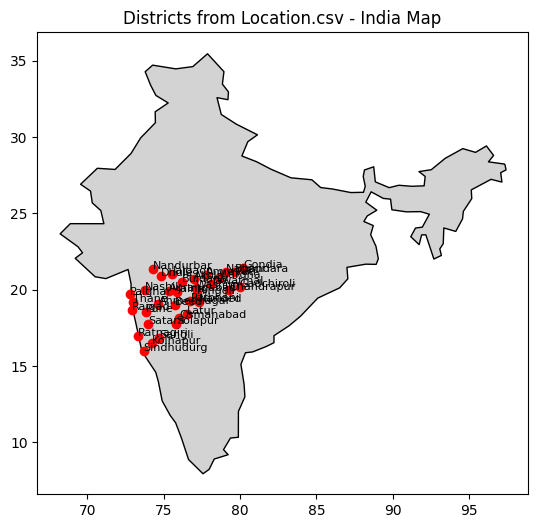

In [ ]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
import matplotlib.pyplot as plt

csv_file = '/content/drive/MyDrive/skymet/Location.csv'
df = pd.read_csv(csv_file)

geometry = [Point(xy) for xy in zip(df['LONGITUDE'], df['LATITUDE'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
india = world[world['name'] == 'India']

ax = india.plot(figsize=(10, 6), color='lightgray', edgecolor='black')

gdf.plot(ax=ax, color='red', marker='o', label='Districts')

for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf['District']):
    ax.text(x, y, label, fontsize=8)

plt.title('Districts from Location.csv - India Map')
plt.show()


In [ ]:
!pip install folium

In [ ]:
import folium
import pandas as pd
csv_file = '/content/drive/MyDrive/skymet/Location.csv'
df = pd.read_csv(csv_file)
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)
for index, row in df.iterrows():
    folium.Marker(location=[row['LATITUDE'], row['LONGITUDE']], popup=row['District']).add_to(india_map)
india_map.save('/content/drive/MyDrive/skymet/india_map_with_districts.html')


In [ ]:
from IPython.display import IFrame

html_path = '/content/drive/MyDrive/skymet/india_map_with_districts.html'
IFrame(html_path, width=800, height=600)
